# Module 2: Statistical Inference

* Lesson 4: SI in the frequentist view
* Lesson 5: SI in the Bayesian view


In [13]:
#reserved for imports
import numpy as np
import matplotlib.pyplot as plt

## Lesson 4: Statistical inference in the frequentist view

### Background reading

A reminder of product and exponent notation and algebra

$\prod_{i=1}^n x_i = x_1 \cdot x_2 \cdot ... \cdot x_n$

$n! = \prod_{i=1}^n i \text{ for } n \geq 1$

#### exponents

$a^x \cdot a^y = a^{x+y}$

$\left(a^x\right)^y = a^{x\cdot y}$

#### logs

if $y = a^x$ then $log_a(y) = x$

1. $log(x\cdot y) = log(x) + log(y)$
2. $log\left(\frac{x}{y}\right) = log(x)-log(y)$
3. $log\left(x^b\right) = b \text{ log}(x)$
4. $log(1) = 0$


#### Argmax
We might be interested in the maximum value of $f(x)$, denoted $\text{max}_x f(x)$, or the value $x$ at that max point, $\hat{x} =\text{ arg max}_x f(x)$

$\text{max}_x f(x) = f(\hat{x})$

### 4.1 Confidence intervals

in F approach, view the data as a random sample from a larger potentially hypothetical population. Then you can make long run frequency statements based on this larger population.

#### Coin example
Flipping a coin 100 times is a sample from the populuation of an infinite number of coin flips. Lets say we get 44H and 56T. 

We can say $X \sim B(p)$ where p is the probability of getting heads.

What is our estimate of p? how confident are we in that estimate?

Start with the CLT: $\sum_{i=1}^{100} X_i \text{ a}\sim N(100p,100p(1-p))$

By the properties of normals, 95% of the time you'll get a result within 1.96 SD of the mean. Or mathematically, a result between:

$100p-1.96 \sqrt{100p(1-p)}$ and $100p+1.96 \sqrt{100p(1-p)}$

This is our confidence interval, CI

We've observed 44H, so our assumed p, $\hat{p} = \frac{44}{100} = 0.44$ 

We plug that into our CI to get

In [9]:
phat = 0.44
n = 100
a = 1.96*np.sqrt(n*phat*(1-phat))
ul = n*phat + a
ll = n*phat - a
print('95 percent confident p is in interval (%f, %f)' % (ll/n, ul/n))

95 percent confident p is in interval (0.342708, 0.537292)


**Miniquiz** In this example of flipping a coin 100 times, observing 44 heads resulted in the following 95% confidence interval for pp: (.343, .537). From this we concluded that it is plausible that the coin may be fair because 0.5 is in the interval.

Suppose instead that we flipped the coin 100,000 times, observing 44,000 heads (the same percentage of heads as before). Then using the method just presented, the 95% confidence interval for $p$ is (.437, .443). Is it reasonable to conclude that this is a fair coin with 95% confidence?

In [10]:
phat = 0.44
n = 100000
a = 1.96*np.sqrt(n*phat*(1-phat))
ul = n*phat + a
ll = n*phat - a
print('95 percent confident p is in interval (%f, %f)' % (ll/n, ul/n))

95 percent confident p is in interval (0.436923, 0.443077)


No, .5 isn't in this range, it's probably not a fair coin.

What does this really mean in the context of a frequentist approach? Refer back to the hypothetical 'infinite number of flips', the population. Each time you create a confidence interval in this way, 95% of intervals we make will contain the true value of p.

Note this assumes that there *is* a fixed, correct value for p, and it's either in the interval or it's not. So in one sense, the probability that p is in the interval calculated from a sample is eitehr zero or one. Not very satisfying. This will contrast with the Bayesian approach.  

**Miniquiz**

In the coin-flipping example, we could repeat this experiment (100 flips) as many times as we wish. Suppose the coin really is fair (p=.5) and we repeat the experiment a large number of times, each time computing a 95% confidence interval. How many of our intervals, on average, would we expect to contain the true value of 0.5?

Answer: About 95%
If the assumptions of the model are met, then this procedure of producing a 95% confidence interval will capture the truth 95% of the time on average. This is what is meant when we say we are "95% confident" that the true pp is in the interval, even though the probability that the true pp is in the interval is 0 or 1 from a frequentist perspective.

### Lesson 4.2 Likelihood function and maximum likelihood

Another example: Consider a hospital where 400 patients are admitted over a month for heart attacks. A month later 72 have died, 328 survived. What's our estimate of the mortality rate in heart attack sufferers?

Under the frequentist paradigm, first establish the reference population. You might say it's heart attack patients in the hospital in general (rather than over a month), HA patients in the region. 

But our sample is not actually a random sample from either of these. You could pretend it is and move on, but that's no good. Maybe a good ref pop is all people in the region and might possibly be admitted to the hospital. But that's a weird and unhelpful hypothtical.

So we have some philisophical issues with the setup of this problem under the frequentist paradigm.

**Miniquiz**
Suppose we proceed to infer the survival rate of all potential heart attack patients in the region. Because we did not randomly sample from this population, and for other reasons, our inference may be biased or invalid. Which of the following is a potential pitfall to inference in this situation?

* There may be other hospitals in the region whose patients’ demographics are different from those admitted to this particular hospital.
* Some patients leave the hospital before 30 days for financial reasons and their outcome is unknown.
* If the original 400 patients were admitted in a relatively short period of time, our inferences may not generalize to other times of the year.
* **All of the above.**
* None of the above.

Notwithstanding these concerns lets press ahead with some inference.

Assume each person comes from a Bernoulli distribution with unknown $p = \theta$ (theta is traditional for an unknown value we're trying to estimate)

$$Y_i \sim B(\theta)$$

$P(Y_i = 1) = \theta$ for all individuals admitted, i.e.the probability that any given patient dies in the 30 day window is $\theta$.

For the entire set of data the PDF can be written in vector form, the probability that all the Ys ($\tilde{Y}$) take some value $\tilde{y}$ give the value of $\theta$, $P(\tilde{Y} = \tilde{y} | \theta)$ which is equivalent to saying the probability the probability that $Y_1$ takes the value $y_1$ and $Y_2$, $y_2$ etc.:

$$P(\tilde{Y} = \tilde{y} | \theta) = P(Y_1 = y_1, Y_2 = y_2, \dots ,Y_n = y_n| \theta) $$

Because we're saying these Y's are iid, we can say that this is the same as the product ($P(A \cap B) = P(A)\cdot P(B)$)

$$= P(Y_1 = y_1|\theta) \cdot P(Y_2 = y_2|\theta) \cdot ... \cdot  P(Y_n = y_n|\theta) = \prod_{i=1}^n P(Y_i,y_i|\theta)$$

This is the probability of observing the actual data that we collected ($\tilde{Y}$), conditioned on a value of the parameter $\theta$.

The PDF of the bernoulli is $f(x|p) = p^x (1-p)^{1-x}x$ 

so we now have a probability function of the vector $\tilde{Y}$, consisting of all the observations $Y_i$, in terms of $y_i$ and $\theta$

$$P(\tilde{Y} = \tilde{y} | \theta) = \prod_{i=1}^n \theta^{y_i} (1-\theta)^{1-y_i}$$

This is the concept of **likelihood** - the PDF of the vector $\tilde{Y}$ expressed as a function of $\theta$. 

$$L(\theta|\tilde{y}) = \prod_{i=1}^n \theta^{y_i} (1-\theta)^{1-y_i}$$

You've essentially flipped the density function: it's now expressed as a function of $\theta$ given $\tilde{y}$, rather than a function of $\tilde{y}$ given $\theta$ 

You can estimate theta by finding the theta value which maximises the likelihood, the *Maximum Likelyhood Estimate*, MLE.

$$\hat{\theta} = \text{argmax L}(\theta|\tilde{y})$$

In practice it's usually easier to maximize the natural log of the likelihood, the **log likelihood**. 

$$l(\theta) = ln L(\theta)$$

Since log is a monotone function, maximising $l(\theta)$ also maxes $L(\theta)$

Y her is IID, so we can use products on probabilities. Using logs on products gives sums, which are easier.

$$l(\theta) = ln \left[ \prod \theta^{y_i} (1-\theta)^{1-y_i} \right] = \sum ln\left[ \theta^{y_i} (1-\theta)^{1-y_i} \right] = \sum \left[y_i ln \theta + (1-y_i)ln(1-\theta)\right]$$

$$ = \left(\sum y_i\right) ln \theta + \left(\sum (1-y_i)\right)ln(1-\theta)$$

You can then maximize theta by finding the derivative and solving for zero. 

**Miniquiz** What is the interpretation of the MLE of $\theta$ in the context of the heart attack example?

* The maximum number of patients who could survive in the 30 day period.
* The life expectancy of the average patient which has the highest likelihood for the data we observed.
* **The value of the 30-day mortality rate which has the highest likelihood for the data we observed.**
* The average number of deaths in the 30 day period.

 
If $\hat{\theta}$ is the MLE for $\theta$, the 30-day mortality rate, then all possible values of $\theta$ produce a lower value of the likelihood than $\hat{\theta}$

### Lesson 4.3: Computing the MLE

$$ l(\theta) = \left(\sum y_i\right) ln \theta + \left(\sum (1-y_i)\right)ln(1-\theta)$$

$$l'(\theta) = \frac{1}{\theta} \sum y_i - \frac{1}{1-\theta} \sum (1-y_i) = 0$$

$$\implies \frac{\sum y_i}{\hat{\theta}} = \frac{\sum (1-y_i)}{1-\hat{\theta}} $$

Where $\hat\theta$ is the maximising value of theta

$$\implies \hat\theta = \frac{1}{n} \sum y_i$$

Note this is the same result we got above with the 44 heads coin flips, sum of results over sample size.

$$ = \hat{p} = \frac{72}{400} = 0.18$$

*so why did we bother?!?!?* 

MLEs are good because unbiased consistent and invarient

Can also use CLT for a confidence interval using $\hat\theta + 1.96\sqrt{\frac{\hat\theta(1-\hat\theta)}{n}}$ 

approximately 

$$\hat\theta \sim N\left(\theta, \frac{1}{I(\hat\theta)}\right)$$

I is the Fisher Information, which we'll return to, but is basically a measure of how much information about theta is in each data point. It's a function of theta.

For Bernoulli, $I(\theta) = \frac{1}{\theta(1-\theta)}$. Notice FI is largest if theta if near 1 or near zero, and smallest which theta is 0.5. Basically an all-heads result when you flip a coin tells you more than if the results are split 50/50.

### Computing MLE examples

#### Exponential distribution

$$X_i \sim Exp(\lambda)$$

$$f(\tilde{x} | \lambda) = \prod_{i=1}^n f(x_i | \lambda) =\prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum x_i} = L(\lambda | \tilde{x})$$

$$l(\lambda) = n \text{ln} \lambda - \lambda\sum x_i$$ 
$$l'(\lambda) = \frac{n}{\lambda} - \sum x_i$$ 
$$\frac{n}{\hat{\lambda}} - \sum x_i = 0 $$
$$\implies \hat{\lambda} = \frac{n}{\sum x_i} = \frac{1}{\overline{x}}$$

i/e the argmax (LME) of lambda is  one over the mean of the observations. That makes sense because the mean of an exponential distribution is one over lambda 

#### Uniform
Let X be a random varibable which is approximately distributed with a start point of 0 but an unknown end point theta

$$X_i \sim U(0,\theta)$$

$$f(\tilde{x} | \theta) = L(\theta | \tilde{x}) = \prod_{i=1}^n \frac{1}{\theta} I_{\{0 \le x_i \le \theta\}}x_i = \theta^{-n} I_{\le min (x_i) \le max (x_i)\le \theta}$$


Note that in assessing the product of the indicator function, if any one of the $x_i$ is not between 0 and theta, the whole product goes to nil. So the condition is that $0 \le min (x_i) \le max (x_i) \le \theta$.

Logging won't actually help us here so look at derivative of L itself

$$ L'(\theta) = -n\theta^{-(n+1)} I_{\le min (x_i) \le max (x_i)\le \theta}$$

(remember indicators hang around when you derive)

Normally we would set this equal to zero and solve for $\hat{\theta}$, but this isn't actually equal to zero for any acceptable (i.e. positive) value of $\hat{\theta}$. But you can also infer that the result when $\hat{\theta}$ is positive is always negative. Since this is a derivative the implication of this is the slope of the PDF is always going down, implying that the function iis maximised when $\theta$ is the smallest possible value. Which is when $\hat{\theta} = \text{max }x_i$ 

**Miniquiz** Suppose we observe $n=5$ independent draws from a $\text{Uniform}(0, \theta)$ distribution. They are $\{0.2, 4.6, 3.3, 4.1, 5.2 \}$. What is the MLE for $\theta$?

From the above $\hat{\theta} = \text{max }x_i$, which here is $5.2$ 

### Lesson 4 Quiz
For Questions 1-3, consider the following scenario:

In the example from Lesson 4.1 of flipping a coin 100 times, suppose instead that you observe 47 heads and 53 tails.

1. Report the value of $\hat{p}$, the MLE (Maximum Likelihood Estimate) of the probability of obtaining heads.

In [1]:
47/100

0.47

Using the central limit theorem as an approximation, and following the example of Lesson 4.1, construct a 95% confidence interval for pp, the probability of obtaining heads.

2. Report the lower end of this interval and round your answer to two decimal places.
3. Report the upper end of this interval and round your answer to two decimal places.

In [4]:
phat = 0.47
n = 100
a = 1.96*np.sqrt(n*phat*(1-phat))
ul = n*phat + a
ll = n*phat - a
print('95 percent confident p is in interval (%f, %f)' % (ll/n, ul/n))

95 percent confident p is in interval (0.372177, 0.567823)


The likelihood function for parameter $\theta$ with data $\mathbf{y}$ is based on which of the following?

$P(\theta∣y)$

$P( y | \theta)$ <- this one

$P(\theta)$

$P(\mathbf{y})$

None of the above.

5. Recall from Lesson 4.4 that if $X_1,\ldots,X_n \overset{\text{iid}}{\sim} \text{Exponential}(\lambda)$ (iid means independent and identically distributed), then the MLE for $\lambda$ is $1/\bar{x}$ where $\bar{x}$ is the sample mean. Suppose we observe the following data: $X_1 = 2.0,\ X_2=2.5,\ X_3=4.1,\ X_4=1.8,\ X_5=4.0$. Calculate the MLE for $\lambda$. Round your answer to two decimal places.

In [5]:
xvect = [2.0,2.5,4.1,1.8,4.0]
1/np.mean(xvect)

0.3472222222222222

It turns out that the sample mean $\bar{x}$  is involved in the MLE calculation for several models. In fact, if the data are independent and identically distributed from a Bernoulli($p$), Poisson($\lambda$), or Normal($\mu$, $\sigma^2$), then $\bar{x}$ is the MLE for $p$, $\lambda$, and $\mu$ respectively.

Suppose we observe $n=4$ data points from a normal distribution with unknown mean $\mu$. The data are $\mathbf{x} = \{-1.2, 0.5, 0.8, -0.3 \}$.

6. What is the MLE for $\mu$ ? Round your answer to two decimal places.

In [6]:
xbar = [-1.2,0.5,0.8,-0.3]
np.mean(xbar)

-0.049999999999999975

## Lesson 5: Bayesian Inference


In [24]:
#helper functions from pervious modules
def fact(x):
    xf = 1
    while x>1:
        xf = xf * x
        x = x-1
    return xf

def choose(n,x):
    nx=n-x
    r = fact(n)/(fact(x)*fact(nx))
    return r

def binom_gen(n,p):
    x = [x for x in range(0,n+1)]
    y = []
    for xval in x:
        yval = choose(n,xval) * p**xval * (1-p)**(n-xval)
        y.append(yval)
    return x, y

def expo_gen(lam,n):
    x = [xval/10 for xval in range(0,10*(n+1))]
    y = []
    for xval in x:
        yval = lam*np.exp(-lam*xval)
        y.append(yval)
        
    return x,y

### Lesson 5 background reading
We've seen the PDF (or Probability Mass Function for discretes) $\f(x) = P(X = x)$ for a random variable $X$.

The **Cumulative distribution function**, CDF is $F(x) = P(X \le x)$. Like the PDF , there is one for every distribution.

For discretes:

$$F(x) = \sum_{t=-\infty}^x f(t) \text{ where } f(t) = P(X=t) \text{ , the PMF}$$

For continuous:

$$F(x) = \int_{-\infty}^x f(t) dt \text{ where } f(t) \text{ is the PDF}$$

#### Example:
    
$X \sim \text{Bin}(5,0.6)$ 

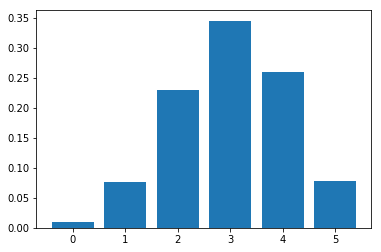

In [15]:
x,y = binom_gen(5,0.6)
plt.bar(x,y)
plt.show()

$$F(1) = P(X \le 1) = \sum_{t=-\infty}^1 { 5\choose t} \cdot 0.6^t \cdot (0.4)^{5-t}$$

$$={5\choose 0} \cdot 0.6^0 \cdot (0.4)^{5-0} + {5\choose 1} \cdot 0.6^1 \cdot (0.4)^{5-1}$$

In [16]:
(choose(5,0)*0.6**0*0.4**5) + (choose(5,1)*0.6**1*0.4**4) 

0.08704

#### Example:
    
$X \sim \text{Exp}(1)$ 

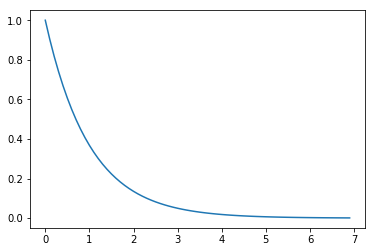

In [18]:


x,y = expo_gen(1,6)
plt.plot(x,y)
plt.show()

$F(2) = \int_{t=-\infty}^2 e^{-t} dt = \left[ -e^{-t} \right]_{0}^2$

Note, change the $-\infty$ to 0 because of the indicator function on X >= 0

$= \left[ -e^{-2} \right] - \left[ -e^{0} \right] $

In [23]:
-np.exp(-2)-(-np.exp(0))

0.8646647167633873

Use the CDF for with 2 values of x to calculate the probability over an interval between those values of x

Let $a$ and $b$ be any real numbers with $a \lt b$. The probability that $X$ falls between $a$ and $b$ is equal to

$$P(a \lt X \le b) = P(X \le b) - P(X \le a) = F(b) - F(a)$$

The **Quantile function** is basically running the CDF backwards: starting with a $p$ value between 0 and 1 and finding $x$ ST $P(X \le x) = p. The result is called the p quartile (or 100p percentile) of the distribution of X.

### Lesson 5.1: Inference example: Frequentist

Your brother has a coin that you know is loaded to come up heads 70% of the time. He comes up to you with a coin wanting to make a bet, but you don't know if it's the loaded coin or not. You flip it 5 times and get 2 heads and 3 tails. Is it the loaded coin? How sure are you?

Start by defining our likelyhood.

$$\theta = \{\text{fair}, \text{loaded}\}$$

$$X \sim \text{Bin}(5, ?)$$

$$f(x|\theta) = {5 \choose x}\cdot(0.5)^5 \text{ if }  \theta = \text{ fair, }{5 \choose x}\cdot(0.7)^x(0.3)^{5-x} \text{ if } \theta = \text{ loaded}$$

$$f(x|\theta) = {5 \choose x}\cdot(0.5)^5I_{\{\theta = \text{fair}\}}+{5 \choose x}\cdot(0.7)^x(0.3)^{5-x}I_{\{\theta = \text{loaded}\}}$$

Here we observed $x=2$. What's our likelyhood? (note, going to start using f instead of L or l - this is convention in Baysian). Plugging into the above

$$f(\theta|X=2) = 0.3125 I_{\{\theta = \text{fair}\}}+1.1323 I_{\{\theta = \text{loaded}\}}$$

The function is maximised when $\theta$ is fair, so MLE $\hat{\theta} = \text{fair}$

**Miniquiz** When X=2, the MLE in this problem is $\hat\theta=\text{fair}$. What is the interpretation of the MLE in this context?

* The MLE is the most likely X we could have observed with five flips, given that the coin is loaded.
* The MLE is the probability that the coin is loaded given that we observed two heads in five flips.
* The MLE is the most likely X we could have observed with five flips, given that the coin is fair.
* **The MLE is the $\theta$ (coin, either fair or loaded) for which observing two heads in five flips is most likely.**

How do we answer the qustion 'how sure are you?'

This is hard to answer in the frquentist paradigm. Another question is the conditional probability, what is $P(\theta = \text{fair} | X=2)$? 

In the FP, the coin is a fixed coin and it has a fixed probability. It's either loaded or not loaded. The probability that it's fair is either 0 or 1. That's not too helpful

### Lesson 5.2: Inference example: Bayesian

An advantage of BP: you can easily incorporate prior info: what you know in advance of looking at data. Can't do this in FP.

Here, you probably know your brother pretty well, how sneaky he is. Suppose you think before flipping it that there's a 60% chance the coin is loaded. So Prior is $P(\text{loaded}) = .6$. You can now update the prior with the data from our flipping using Bayes theorem.

$$f(\theta|x) = \frac{f(x|\theta)f(\theta)}{\sum_\theta f(x|\theta)f(\theta)}$$

$$=\frac{{5 \choose x}\left[(0.5)^5 (0.4) I_{\{\theta=fair\}}+(0.7)^x (0.3)^{5-x}(0.6) I_{\{\theta=loaded\}}\right]}{{5 \choose x}\left[(0.5)^5(0.4)+(0.7)^x(0.3)^{5-x}(0.6)\right]}$$

$$f(\theta|X=2) = \frac{0.0125 I_{\{\theta=fair\}} +  0.0079 I_{\{\theta=loaded\}}}{0.0125+0.0079} = 0.612 I_{\{\theta=fair\}} +  0.388 I_{\{\theta=loaded\}}$$

Notice the prior is in the numerator, and in the denominator there's a normalising constant, which makes the probabilities add up to one. This is case even with more complicated calculations.

$$P(\theta=\text{loaded}|X=2) = .388$$

A much more intuitive and satisfying answer than under FP.

**Miniquiz** In this example, what is the interpretation of $P(\theta=\text{loaded})$?

* Your "posterior" probability that the coin was loaded, after observing two heads.
* The true probability that the coin was loaded, regardless of data.
* **Your "prior" probability that the coin was loaded, before observing any data.**

What is the interpretation of $P(\theta=\text{loaded} \mid X=2)$?

* **Your "posterior" probability that the coin was loaded, after observing two heads.**
* Your "prior" probability that the coin was loaded, before observing any data.
* The true probability that the coin was loaded, regardless of data.

What happens under different priors?

$$P(\theta = \text{loaded})=0.5 \implies P(\theta = \text{loaded} | X=2) = 0.297$$
$$P(\theta = \text{loaded})=0.9 \implies P(\theta = \text{loaded} | X=2) = 0.792$$

The Bayesian approach here is inherently subjective, very much based on what you think you know about your brother. This is a feature of the paradigm. This is OK, it's all within a mathematically coherent and consistent framework.

You end up with interpretable results. You can't do this with frequentist, which has lots of buried subjective assumptions: you need to choose a reference population. The subjectivity is more upfront in Bayesian. 

**Miniquiz** Recall that the loaded coin comes up heads 70% of the time on average, and a fair coin comes up heads about 50% of the time.

Based on past experience or expert knowledge of your brother's behavior, your prior probability that the coin was loaded was 0.6. After testing the coin five times and observing two heads, the posterior probability that the coin was loaded became 0.388.

What effect did these data have on your beliefs about the coin?

* The data favored the hypothesis that the coin was loaded, increasing your probability that the coin was loaded.
* **The data favored the hypothesis that the coin was fair, reducing your probability that the coin was loaded.**
* The data favored the hypothesis that the coin was loaded, reducing your probability that the coin was loaded.
* The data favored the hypothesis that the coin was fair, increasing your probability that the coin was loaded.

### Quiz on lessons 5.1-5.2

For Questions 1-5, consider the following scenario:

You are trying to ascertain your American colleague's political preferences. To do so, you design a questionnaire with five yes/no questions relating to current issues. The questions are all worded so that a "yes" response indicates a conservative viewpoint.

Let $\theta$ be the unknown political viewpoint of your colleague, which we will assume can only take values $\theta=\text{conservative}$ or $\theta=\text{liberal}$. You have no reason to believe that your colleague leans one way or the other, so you assign the prior $P(\theta=\text{conservative}) = 0.5$.

Assume the five questions are independent and let $Y$ count the number of "yes" responses. If your colleague is conservative, then the probability of a "yes" response on any given question is 0.8. If your colleague is liberal, the probability of a "no" response on any given question is 0.7.

1. What is an appropriate likelihood for this scenario?


* $f(y \mid \theta) = {5 \choose y} 0.2^y 0.8^{5-y}$
* $f(y \mid \theta) = {5 \choose y} 0.8^y 0.2^{5-y}$
* $f(y \mid \theta) = {5 \choose y} 0.8^y 0.2^{5-y} I_{\{\theta=\text{conservative}\}} + {5 \choose y} 0.3^y 0.7^{5-y} I_{\{\theta=\text{liberal}\}}$
* $f(y \mid \theta) = \theta^y e^{-\theta}/y!$
* $f(y \mid \theta) = {5 \choose y} 0.3^y 0.7^{5-y} I_{\{\theta=\text{conservative}\}} + {5 \choose y} 0.8^y 0.2^{5-y} I_{\{\theta=\text{liberal}\}}$

$Y \sim Bin(5,p)$

$\theta \in \{\text{con}, \text{lib}\}$

$$f(x \mid \theta) = $$

$$L(\theta \mid \tilde{Y} = \tilde{y})= \prod_{i} f(y_i \mid \theta) =  \prod_{i} {5 \choose y_i} \theta^{y_i} (1-\theta)^{5-y_i}$$ 

In [1]:
#Basic Maths
def factorial(x):
    return (x * factorial(x-1) if x >1 else 1)

def choose(n,x):
    return factorial(n)/(factorial(x)*factorial(n-x))

choose(5,0)*0.80**0*0.2**5

0.0003200000000000001

In [5]:
choose(5,0)*0.80**0*0.2**5*0.5/ (choose(5,0)*0.80**0*0.2**5*0.5 + choose(5,0)*0.30**0*0.7**5*0.5)

0.0019003503771007793

In [6]:
choose(5,0)*0.30**0*0.7**5*0.5 /(choose(5,0)*0.80**0*0.2**5*0.5 + choose(5,0)*0.30**0*0.7**5*0.5)

0.9980996496228993

In [7]:
choose(4,2)*0.50**2*0.5**(4-2)

0.375

In [8]:
choose(4,2)*0.70**2*0.3**(4-2)

0.26459999999999995

In [9]:
choose(4,2)*0.30**2*0.7**(4-2)

0.2646

In [12]:
a = choose(4,2)*0.5**4*0.4
b = choose(4,2)*0.5**4*0.4 + choose(4,2)*0.7**2*0.3**2*0.3 + choose(4,2)*0.7**2*0.3**2*0.3 
fair = a/b
fair

0.48581422464049756

In [17]:
a = choose(4,2)*0.7**2*0.3**2*0.3
load = a/b
load*2

0.5141857753595024

In [16]:
fair + load + load

1.0

### Lesson 5.3: Continuous version of Bayes

$$f(\theta \mid y) = \frac{f(y \mid \theta)f(\theta)}{f(y)} = \frac{f(y \mid \theta)f(\theta)}{\int f(y \mid \theta)f(\theta) d\theta} = \frac{\text{likelihood x prior}}{\text{normalizing constant}}$$

Normalizing constant just makes sure all probabilities add to 1, so $f(\theta \mid y)$ is a proper PDF.

In practice the NC integral can be hard to do, so you can just do the top, and back solve into the normalising constant by finding the number that brings the total probs to 1.  

$$\frac{\text{likelihood x prior}}{\text{normalizing constant}} \propto \text{likelihood x prior}$$

**miniquiz:** Why are we allowed to (temporarily) ignore the normalizing constant when finding a posterior distribution?

* **The posterior is a PDF of $\theta$, but $\theta$ does not appear in $f(y)$, so the absence of $f(y)$ does not change the form of the posterior.**
* If we kept the normalizing constant, it would cancel with the likelihood because they are both probability density functions of the data $y$.
* The prior contains the only relevant information about the data $y$, so that $f(y)$ is no longer necessary.

**miniquiz:** The versions of Bayes' theorem seen before this lesson were for discrete probabilities with probability mass functions. In this lesson, $\theta$ is a continuous quantity which can take on infinitely many values, so the prior (and consequently the posterior) for $\theta$ is a probability density function. Which of the following is another distinction between this and previous versions of Bayes' theorem?

* **The summation over all values of $\theta$ in the denominator is replaced with an integral over all values of $\theta$.**
* The prior is a function of $\theta$ rather than a function of $y \mid \theta$.
* There was no normalizing constant in previous versions.
* The likelihood is calculated for infinitely many $y$ values rather than a finite number.

Say we have a coin, with unknown probability $\theta$ of coming up heads. Having no info on the value of theta, we express our ignorance by assigning it a uniform distribution $\theta \sim U(0,1)$, $f(\theta) = I_{0 \le \theta \le 1}$

We flip the coin and get one head. Having observed that, what is our posterior probability distribution for theta?

$$f(\theta \mid Y=1) = \frac{\theta^1(1-\theta)^0 I_{0 \le \theta \le 1}}{\int_{-\infty}^\infty \theta^1(1-\theta)^0 I_{0 \le \theta \le 1} d\theta} = \frac{\theta I_{0 \le \theta \le 1}}{\int_0^1 \theta d\theta} = \frac{\theta I_{0 \le \theta \le 1}}{\left[\frac{1}{2}\theta^2\right]_0^1} = 2\theta I_{0 \le \theta \le 1}$$

That was the direct approach, where you do the integral to get to the NC. If we were to take the indirect approach and back into the NC, you would say the $f(\theta \mid y) \propto \theta I_{0 \le\theta\le 1}$, and would normalise with whatever number will bring the intergral of $\theta I_{0 \le\theta\le 1}$ to 1, which is 2.

**miniquiz:** Recall that the Bernoulli likelihood takes the form $\theta^y (1-\theta)^{1-y}$. Assuming a uniform prior as in the lesson, what is the form of the posterior if we had instead observed $Y=0$? That is, find $f(\theta \mid Y=0)$.

$$f(\theta \mid Y=0) = \frac{\theta^0(1-\theta)^1 I_{0 \le \theta \le 1}}{\int_{-\infty}^\infty \theta^0(1-\theta)^1 I_{0 \le \theta \le 1} d\theta} = \frac{(1-\theta) I_{0 \le \theta \le 1}}{\int_{0}^1 (1-\theta)d\theta} = \frac{(1-\theta) I_{0 \le \theta \le 1}}{\left[(\theta-\frac{1}{2}\theta^2)\right]_0^1}$$

$$= \frac{(1-\theta) I_{0 \le \theta \le 1}}{\left[(1-\frac{1}{2})\right]-[0]} = 2(1-\theta)I_{0 \le\theta\le 1}$$

### Lesson 5.4 Posterior intervals

Lets plot the prior and posterior of the thing we looked at in the last example. The prior is just $U(0,1)$, i.e. a horizontal line between 0 and 1 at a non-zero value, and zero everywhere else.

The Posterior, $f(\theta \mid Y = 1) = 2\theta I_{0\le \theta \le 1}$ looks like a diagonal line, with co-ordinates (0,0) and (1,2). This is a graphical representation that our posterior view is that \theta is more likely to be close to 1 because we saw 1 head.

We can look at prior and posterior interval estimates:

**Prior**

$P(.025 \lt \theta \lt .975) = .975-.025 = .95$

$P(\theta \gt .05) = 1-.05 = .95$

Graphically you can think about this as integrating regions under the density. Here it's super simple to compute, beacuse uniform.

**Posterior**

$P(.025 \lt \theta \lt\ .975) = \int_.025^.975 2\theta d\theta = \left[ \theta^2 \right]_.025^.975 = .975^2 - .025^2$

In [1]:
.975**2 - .025**2

0.95

So it's the same as the prior. This is because the interval is equidistant from both ends. Think of it like chopping off one 'end' of graph and putting on the other. You end up with the same amount in the middle.

What about $P(\theta \gt .05)$?

$1-[\theta^2]_0^.05 = 1-.05^2$

In [3]:
1-.05**2

0.9975

So higher, which makes sense if you look at the graph, and also if you think about the scenario: the probability that $\theta$ is very small (i.e. the coin is very biased to tails) is quite unlikely given you've seen a head.

What is the **posterior interval of interest**,that contains say 95% of the likelyhood. Similar in concept to the Confidence Interval in the frequentist approach.

2 Main ways:
* equal tailed intervals
* highest posterior density intervals

ETI: put an equal amount of probability in each tail. So a 95% interval will have 2.5% in each tail. To do this, figure out what the quantiles are.

$P(\theta \lt q \mid Y=1) = \int_0^q 2\theta d\theta = q^2)$

So we can say an interval $P(\sqrt{.025} \lt \theta \lt \sqrt{.975}) = 95\%$

HPD: Where in the density is it highest. Back on the graph, its the shortest possible interval which contains the given probability. Obviously here it will always include 1, and spread backwards from there.

$P(\theta \gt \sqrt{.05} \mid Y = 1) = P(\theta \gt .224 \mid Y = 1) = .95$ 

In the Bayesian approach, we represent uncertainty with probabilities. The coin may be a physical object with the value for theta either 0 or 1, but in the Bayesian approach we represent the fact the we don't know with a distribution.

### Quiz: 5.3 and 5.4

1. We use the continuous version of Bayes’ theorem if:


* $\theta$ **is continuous**
* Y is continuous
* $f(y \mid \theta)$ is continuous
* All of the above
* None of the above



In [4]:
.674-.326

0.34800000000000003

In [5]:
.756-.4

0.356

In [6]:
.567-.196

0.37099999999999994

Suppose you collect measurements to perform inference about a population mean $\theta$. Your posterior distribution after observing data is $\theta \mid \mathbf{y} \sim \text{N}(0,1)$.

Report the upper end of a 95% equal-tailed interval for $\theta$. Round your answer to two decimal places.

In [8]:
from scipy.stats import norm
norm.ppf(.975,0,1)

1.959963984540054